#
## 0. Loading the datasets and a quick analysis

In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
#from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small') 

In [2]:
from siml.detect_peaks import *
from siml.signal_analysis_utils import *

In [3]:
df_air = pd.read_csv('./data/AirPassengers.csv',
        parse_dates=['Month'],
        date_parser=lambda x: pd.to_datetime(x, format='%Y-%m', errors = 'coerce'))
df_air = df_air.set_index('Month')
df_air

C:\Users\torsten.schmidt\AppData\Local\Temp\ipykernel_8728\386692992.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_air = pd.read_csv('./data/AirPassengers.csv',


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df_carbon = pd.read_csv('./data/MER_T12_06.csv',
            parse_dates=['YYYYMM'],
            date_parser=lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce'))

df_carbon['Value'] = pd.to_numeric(df_carbon['Value'] , errors='coerce')
df_carbon = df_carbon.dropna(subset=['YYYYMM','Value'], how='any')
df_carbon.loc[:,'Description'] = df_carbon['Description'].apply(lambda x: x.split(',')[0].replace(' CO2 Emissions',''))


display(df_air)
display(df_carbon)

C:\Users\torsten.schmidt\AppData\Local\Temp\ipykernel_8728\3849820170.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_carbon = pd.read_csv('./data/MER_T12_06.csv',


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...,...
5089,TXEIEUS,2016-03-01,115.997,9,Total Energy Electric Power Sector,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,2016-04-01,113.815,9,Total Energy Electric Power Sector,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,2016-05-01,129.440,9,Total Energy Electric Power Sector,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,2016-06-01,172.074,9,Total Energy Electric Power Sector,Million Metric Tons of Carbon Dioxide


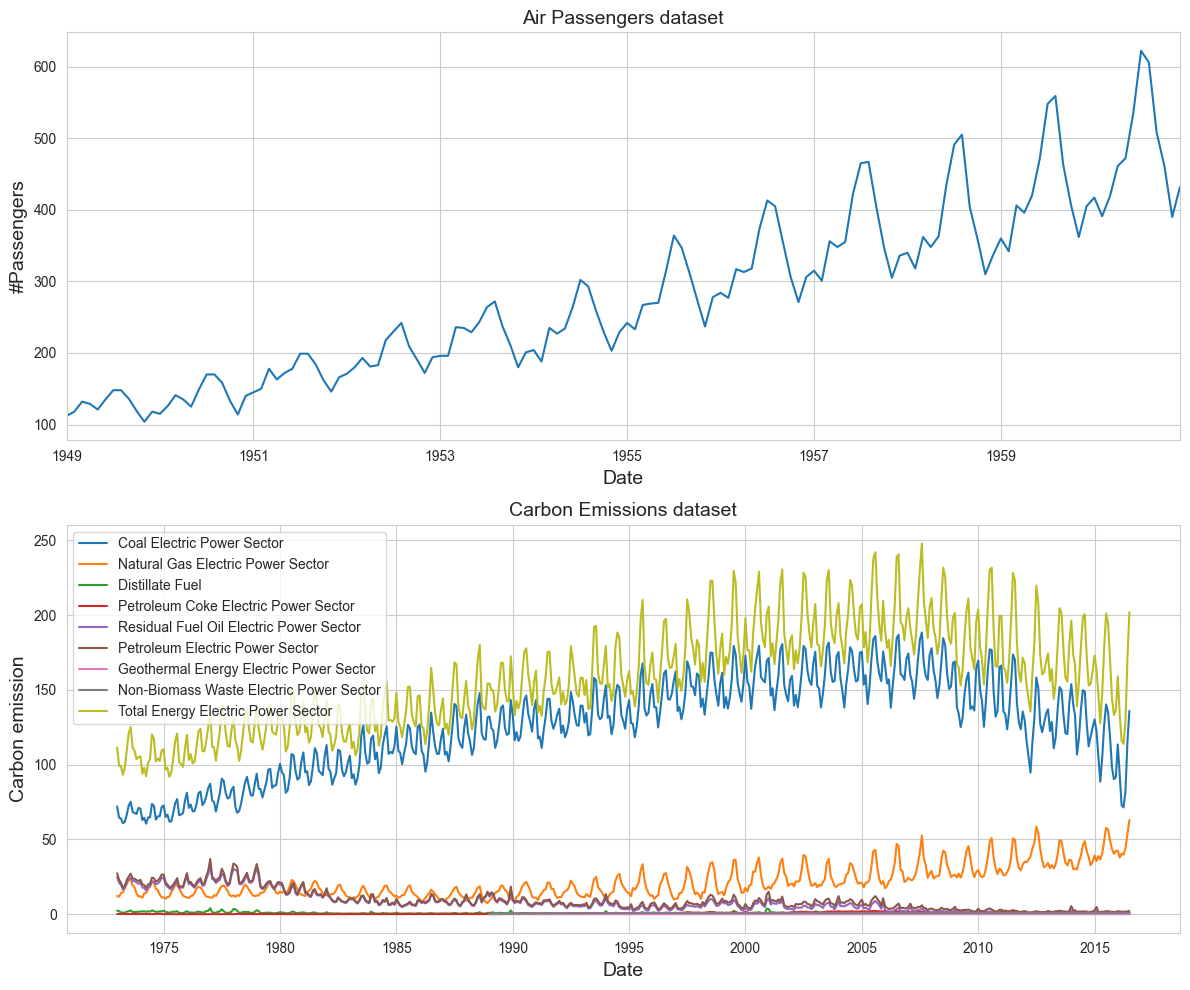

In [5]:
fig, axarr = plt.subplots(figsize=(12,10),nrows=2)
df_air['#Passengers'].plot(kind='line', ax=axarr[0])
sns.lineplot(data=df_carbon, x='YYYYMM', y='Value', hue='Description', ax=axarr[1])

axarr[1].legend(loc='upper left')

axarr[0].set_title('Air Passengers dataset', fontsize=14)
axarr[1].set_title('Carbon Emissions dataset', fontsize=14)

axarr[0].set_xlabel('Date', fontsize=14)
axarr[1].set_xlabel('Date', fontsize=14)

axarr[0].set_ylabel('#Passengers', fontsize=14)
axarr[1].set_ylabel('Carbon emission', fontsize=14)
plt.tight_layout()
plt.show()

## 1. Detrending the Air passenger dataset.


## 1.1 Detrending using stasmodels.seasonal_decompose()

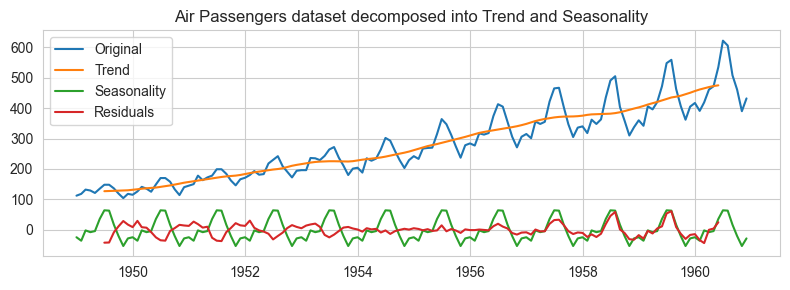

In [6]:
decomposition = seasonal_decompose(df_air)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df_air, label='Original')
ax.plot(trend, label='Trend')
ax.plot(seasonal, label='Seasonality')
ax.plot(residual, label='Residuals')
ax.legend(loc='best')
ax.set_title('Air Passengers dataset decomposed into Trend and Seasonality')
plt.tight_layout()
plt.show()

## 1.2 detrending using numpy's polyfit()

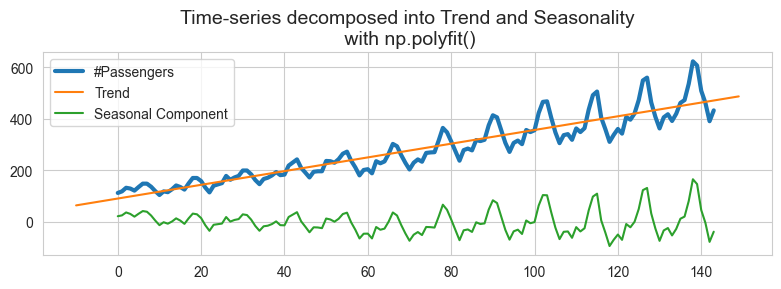

In [7]:
yvalues = df_air['#Passengers']
xvalues = range(len(yvalues))
xvalues_extended = range(-10,150)

z1 = np.polyfit(xvalues, yvalues, deg=1)
p1 = np.poly1d(z1)
yvalues_trend = p1(xvalues_extended)
yvalues_detrended = yvalues - p1(xvalues)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(xvalues, yvalues, label='#Passengers',linewidth=3)
ax.plot(xvalues_extended, yvalues_trend, label='Trend')
ax.plot(xvalues, yvalues_detrended, label='Seasonal Component')
ax.legend()
ax.set_title('Time-series decomposed into Trend and Seasonality\n with np.polyfit()', fontsize=14)
plt.tight_layout()
plt.show()
#plt.savefig('./signal_forecasting_figure5b.png')

## 2. Using the Fourier Transform to go from the time-domain to the frequency domain

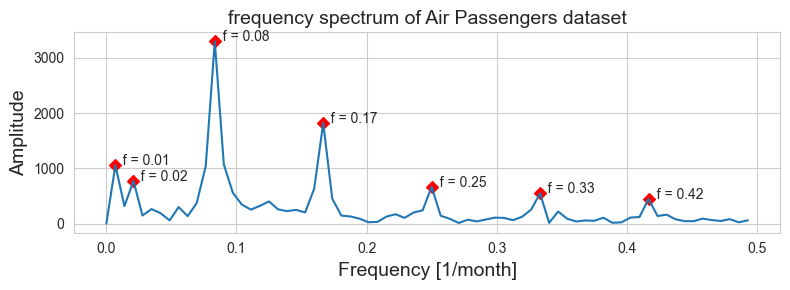

In [8]:
fraction_signal = 1.0
#mph = 0.4
deg_polyfit= 1

yvalues = df_air['#Passengers'].values
fft_x, fft_y, p2 = construct_fft(yvalues, deg_polyfit)
indices_peaks = detect_peaks(fft_y, mph=430)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(fft_x, fft_y)
ax.scatter(fft_x[indices_peaks], fft_y[indices_peaks], color='red',marker='D')
ax.set_title('frequency spectrum of Air Passengers dataset', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Frequency [1/month]', fontsize=14)
for idx in indices_peaks:
    x,y = fft_x[idx], fft_y[idx]
    text = "  f = {:.2f}".format(x,y)
    ax.annotate(text, (x,y))
plt.tight_layout()
#plt.savefig('./signal_forecasting_figure8.png')
plt.show()

## 2.1 Reconstructing the Time-domain using np.fft.ifft()

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


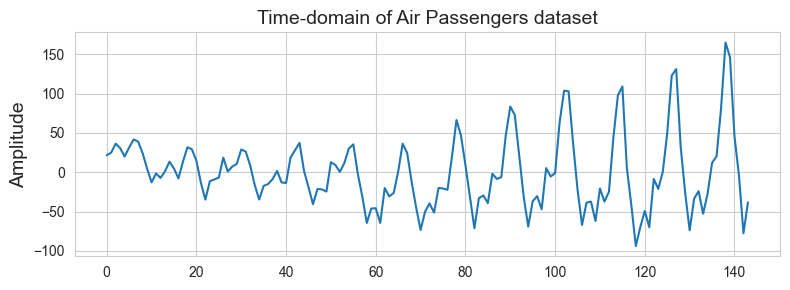

In [9]:
fft_y_  = np.fft.fft(yvalues_detrended)
inverse_fft = np.fft.ifft(fft_y_)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(inverse_fft, label='The inverse of the freq. spectrum')
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_title('Time-domain of Air Passengers dataset', fontsize=14)
plt.tight_layout()
#plt.savefig('./signal_forecasting_figure11.png')
plt.show()

## 2.2 Reconstructing the time-domain using np.fft.ifft() and parts of the frequency spectrum

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


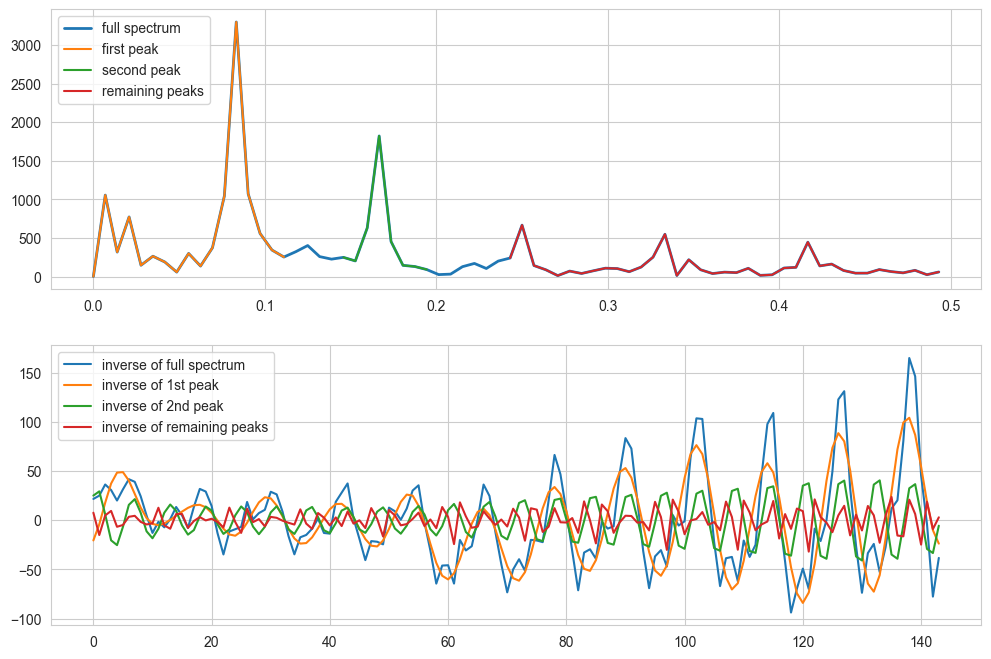

In [10]:
fig, axarr = plt.subplots(figsize=(12,8), nrows=2)
axarr[0].plot(fft_x, fft_y, linewidth=2, label='full spectrum')
axarr[0].plot(fft_x[:17], fft_y[:17], label='first peak')
axarr[0].plot(fft_x[21:29], fft_y[21:29], label='second peak')
axarr[0].plot(fft_x[35:], fft_y[35:], label='remaining peaks')
axarr[0].legend(loc='upper left')
fft_y_copy1 = fft_y_.copy()
fft_y_copy2 = fft_y_.copy()
fft_y_copy3 = fft_y_.copy()
fft_y_copy1[17:-17] = 0
fft_y_copy2[:21] = 0
fft_y_copy2[29:-29] = 0
fft_y_copy2[-21:] = 0
fft_y_copy3[:35] = 0
fft_y_copy3[-35:] = 0
inverse_fft = np.fft.ifft(fft_y_)
inverse_fft1 = np.fft.ifft(fft_y_copy1)
inverse_fft2 = np.fft.ifft(fft_y_copy2)
inverse_fft3 = np.fft.ifft(fft_y_copy3)
axarr[1].plot(inverse_fft, label='inverse of full spectrum')
axarr[1].plot(inverse_fft1, label='inverse of 1st peak')
axarr[1].plot(inverse_fft2, label='inverse of 2nd peak')
axarr[1].plot(inverse_fft3, label='inverse of remaining peaks')
axarr[1].legend(loc='upper left')
plt.show()
#plt.savefig('./signal_forecasting_figure12.png')

## 2.3 Reconstructing the time-domain using our own function

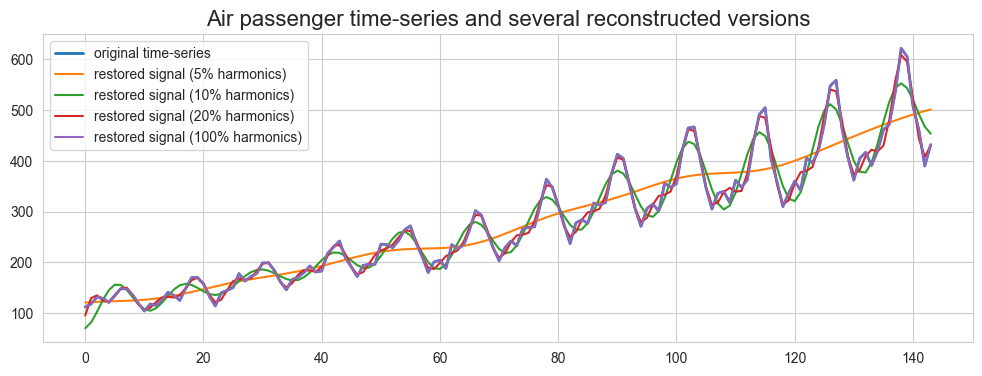

In [11]:
yvalues = df_air['#Passengers'].values
xvalues = np.arange(len(yvalues))
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(yvalues, linewidth=2, label='original time-series')

list_frac_harmonics = [0.05, 0.1, 0.2, 1.0]
for ii, frac_harmonic in enumerate(list_frac_harmonics):
    yvalues_restored = reconstruct_from_fft(yvalues, frac_harmonics=frac_harmonic)
    label = 'restored signal ({:.0f}% harmonics)'.format(100*frac_harmonic)
    ax.plot(yvalues_restored, label=label)
ax.legend(loc='upper left')
ax.set_title('Air passenger time-series and several reconstructed versions', fontsize=16)
plt.show()

## 3. Time-series forecasting on the Carbon dataset

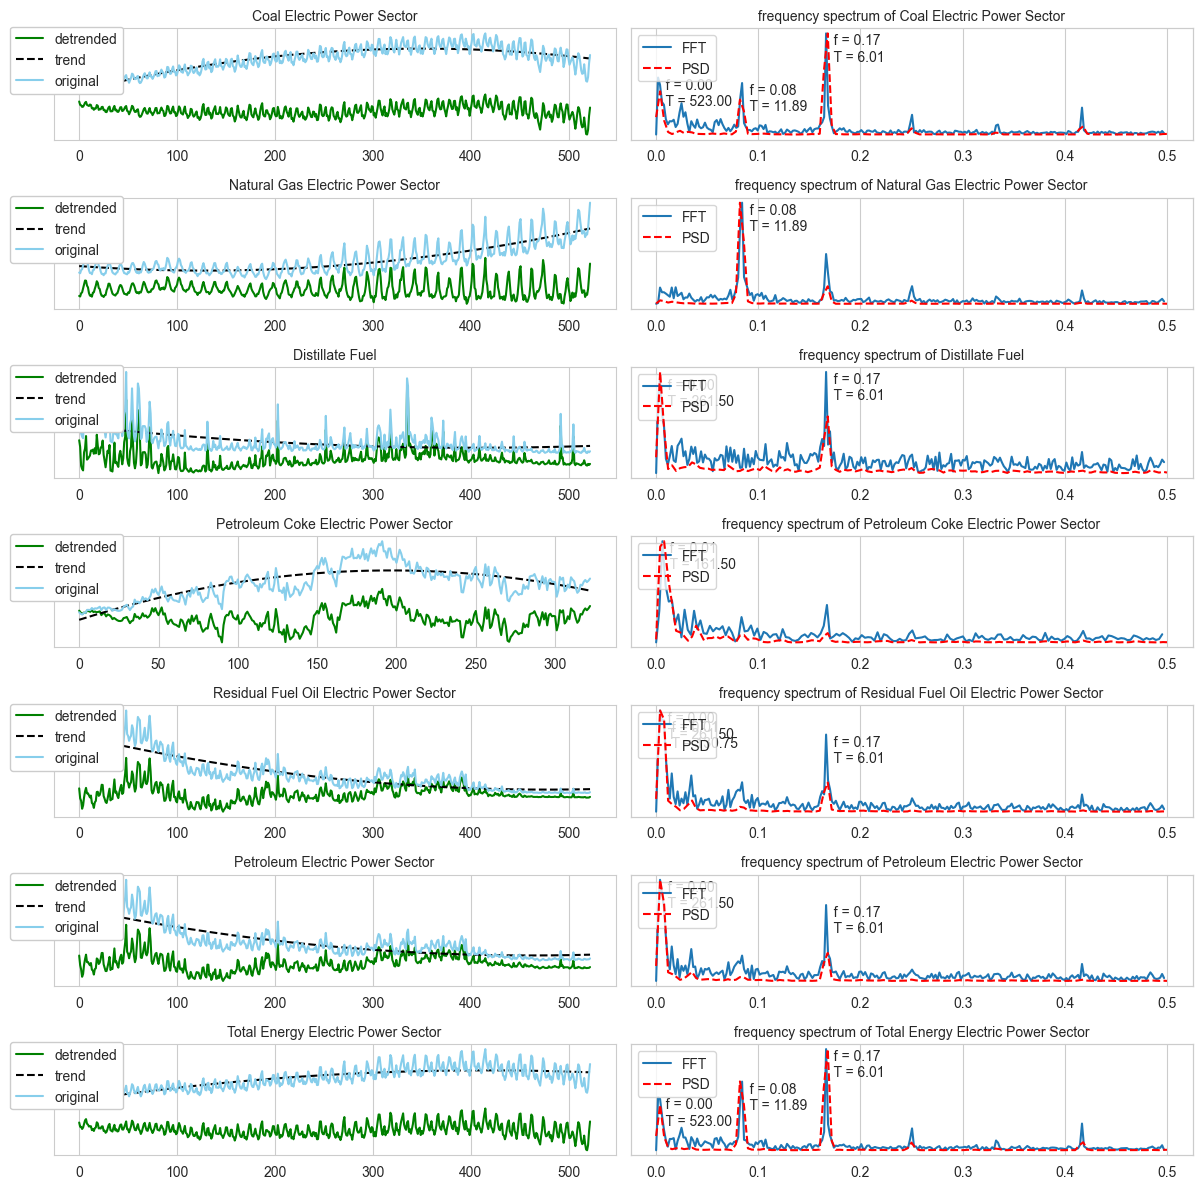

In [12]:
source_types = [
'Coal Electric Power Sector', 
'Natural Gas Electric Power Sector',
'Distillate Fuel', 
'Petroleum Coke Electric Power Sector',
'Residual Fuel Oil Electric Power Sector',
'Petroleum Electric Power Sector',
'Total Energy Electric Power Sector'
]

dict_yvalues = {}
N = 200
ycol = 'Value'
fig, axarr = plt.subplots(figsize=(12,12), nrows=7, ncols=2)
for ii, desc in enumerate(source_types):
    df_ = df_carbon[df_carbon['Description'] == desc]
    yvalues = df_[ycol].values
    if desc == 'Petroleum Coke Electric Power Sector':
        yvalues = yvalues[N:]
    xvalues = np.arange(len(yvalues))
    
    yvalues_detrended = plot_yvalues(axarr[ii,0], xvalues, yvalues, plot_original=True, polydeg=2)
    plot_fft_psd(axarr[ii,1], yvalues_detrended, plot_psd=True)
    axarr[ii,0].set_title(desc,fontsize=10)
    axarr[ii,1].set_title('frequency spectrum of {}'.format(desc),fontsize=10)
plt.tight_layout()
#plt.savefig('./signal_forecasting_figure13.png')
plt.show()

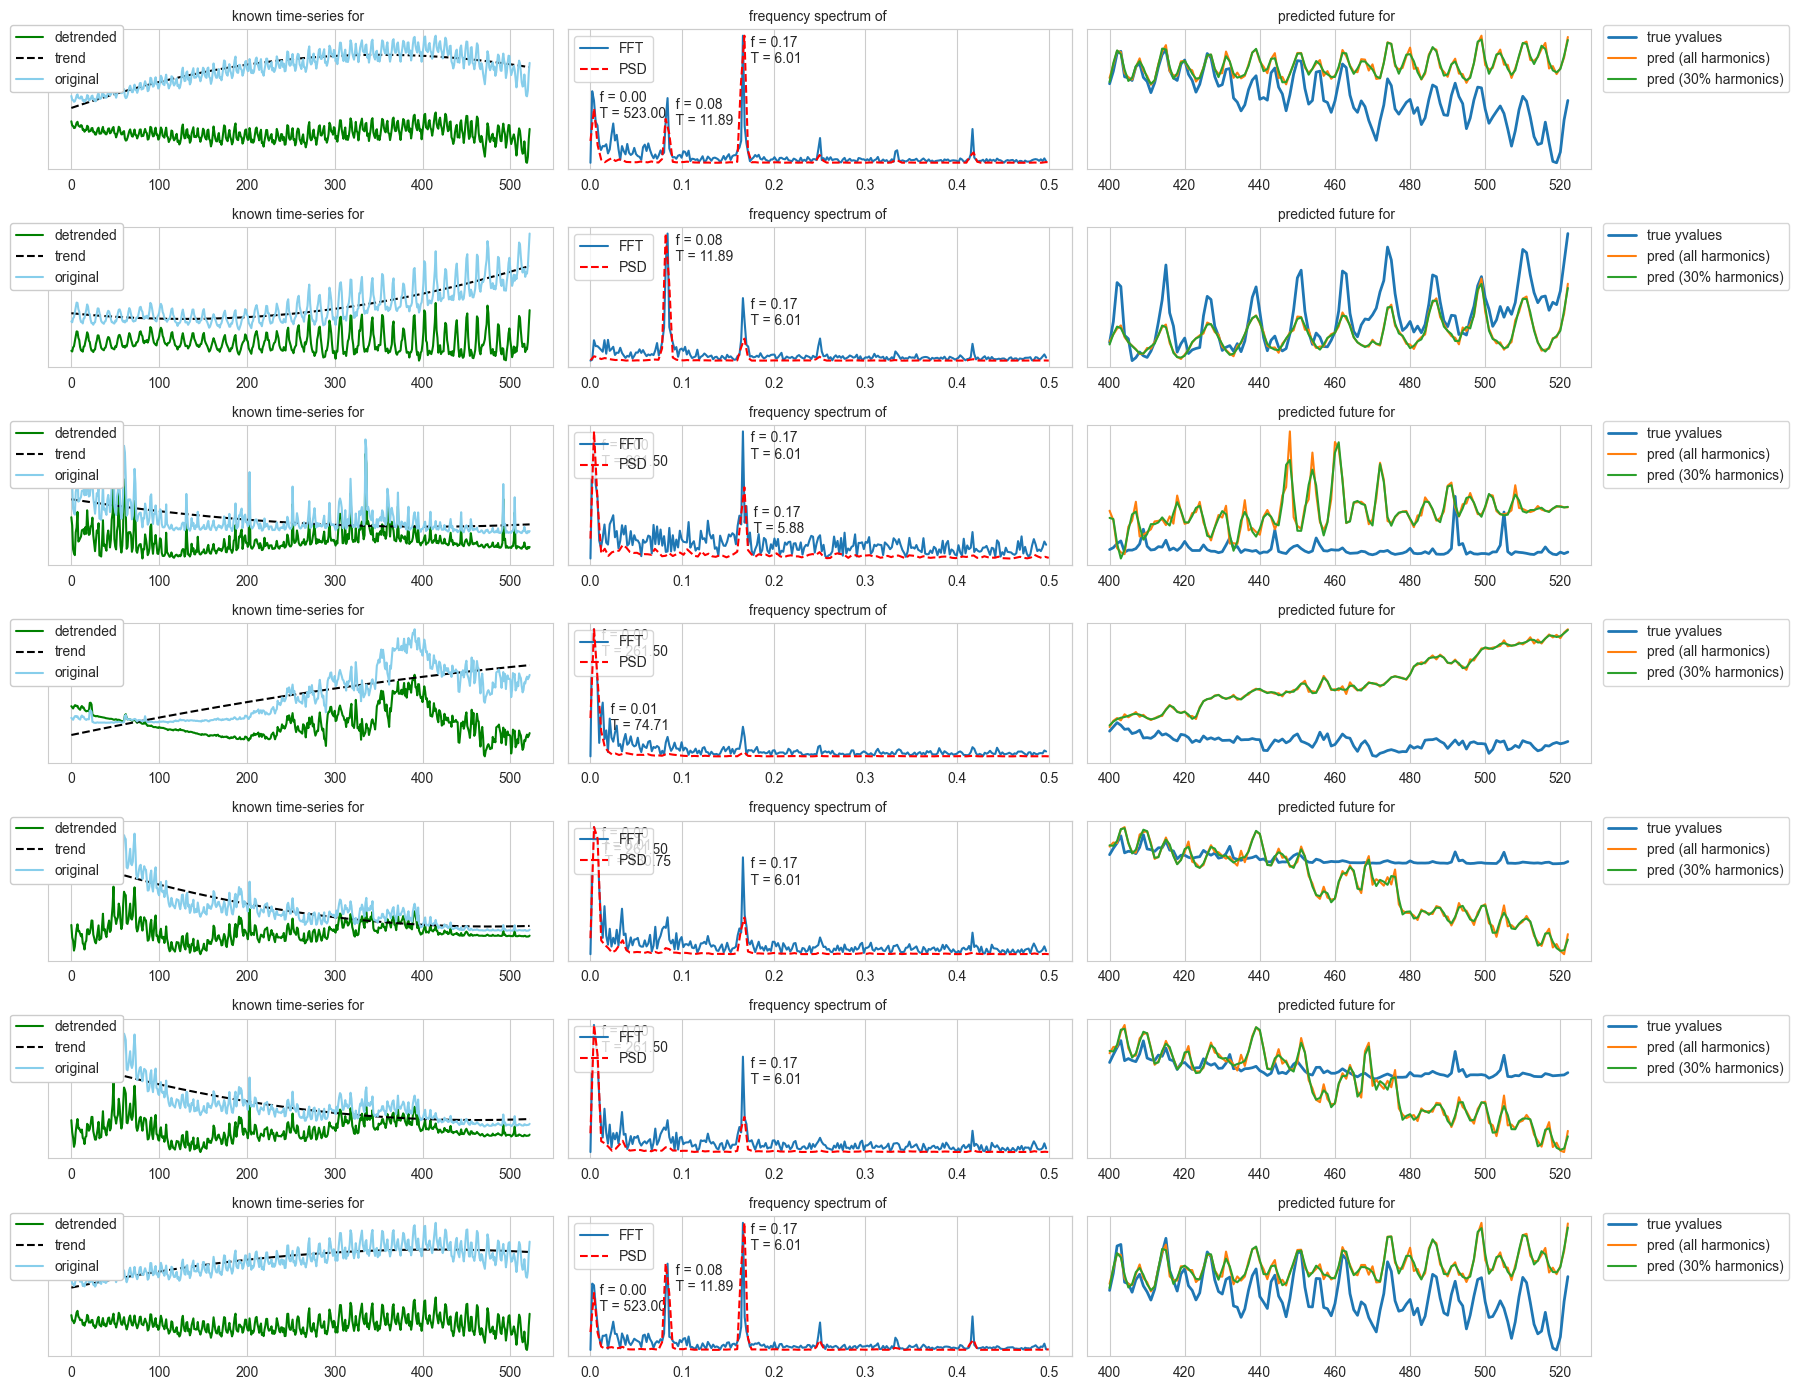

In [15]:
N = 400
nrows=len(source_types)
frac_harmonics = 0.3
fraction_signal = 0.6
max_peak = 0.4
ycol = 'Value'
axtitle = 'desc {}'
fig, axarr = plt.subplots(figsize=(18,2*nrows), ncols=3, nrows=nrows)
for row_no, desc in enumerate(source_types):
    df_ = df_carbon[df_carbon['Description'] == desc]
    yvalues_full = df_[ycol].values
    xvalues_full = np.arange(len(yvalues_full))
    yvalues_known = yvalues_full[:N]
    xvalues_known = np.arange(len(yvalues_known))
    yvalues_future = yvalues_full[N:]
    xvalues_future = np.arange(N, len(xvalues_full))
    N_extrapolation = len(yvalues_future)
    yvalues_detrended = plot_yvalues(axarr[row_no, 0], xvalues_full, yvalues_full, plot_original=True, polydeg=2)
    fft_x_, fft_y_ = plot_fft_psd(axarr[row_no, 1], yvalues_detrended, plot_psd=True, max_peak=max_peak)
    yvalues_predicted1 = reconstruct_from_fft(yvalues_known, extrapolate_with=N_extrapolation, fraction_signal=fraction_signal)
    yvalues_predicted2 = reconstruct_from_fft(yvalues_known, extrapolate_with=N_extrapolation, fraction_signal=fraction_signal, frac_harmonics=frac_harmonics)
    axarr[row_no,2].plot(xvalues_future, yvalues_future, label='true yvalues', linewidth=2)
    axarr[row_no,2].plot(xvalues_future, yvalues_predicted1, label='pred (all harmonics)')
    axarr[row_no,2].plot(xvalues_future, yvalues_predicted2, label='pred (30% harmonics)')
    title = ''
    #axtitle.format(store)
    axarr[row_no,0].set_title('known time-series for {}'.format(title),fontsize=10)
    axarr[row_no,1].set_title('frequency spectrum of {}'.format(title),fontsize=10)
    axarr[row_no,2].set_title('predicted future for {}'.format(title),fontsize=10)
    axarr[row_no,2].set_yticks([])
    axarr[row_no,2].legend(loc='upper left', bbox_to_anchor=(1.01, 1.078))
plt.tight_layout()
plt.savefig(f'./carbon_emission_prediction_.png')
plt.show()
plt.close()